In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import LinearSegmentedColormap

import statistics as stat
import math
import json

from urllib.request import urlopen
from datetime import datetime, timedelta
from collections import Counter

# Global Level Gathering
The following cell automatically builds the url that is linked to the download page from the [ECDC Website](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). The ECDC updates the file name to match the day that is was most currently updated, so by getting todays date, we can grab the most up to date data from the website. 


In [2]:
time = datetime.now()
date = time.strftime("%Y-%m-%d")
url = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
df = pd.read_excel(url, parse_dates=['dateRep'])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia


In [3]:
# this cell is for adding a value for Spain for today, 
# since they are the only country that doesn't report the latest day on time
# this cell just duplicates their previous days data
today_timestamp = df.dateRep.tolist()[0]
spainData = df[df['countriesAndTerritories']=='Spain']

spainRow = {
    'dateRep': [today_timestamp],
    'day': [today_timestamp.day],
    'month': [today_timestamp.month],
    'year': [today_timestamp.year],
    'cases': [spainData.cases.values[0]],
    'deaths': [spainData.deaths.values[0]],
    'countriesAndTerritories': ['Spain'],
    'geoId': ['ES'],
    'countryterritoryCode': ['ESP'],
    'popData2018': [46723749],
    'continentExp': ['Europe']
}

row_df = pd.DataFrame(data=spainRow)
df = pd.concat([row_df, df], ignore_index=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-04,4,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe
1,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
#pass a sliced list to determine
def running_sum(a):
  tot = 0
  for item in a:
    tot += item
    yield tot

In [5]:
def total_cases(df, string):
    row = df[string]
    num_list = row.values
    tot = np.cumsum(num_list)
    return tot

In [6]:
def recentNationDate():
    return df['dateRep'][:1].values[0]

In [7]:
#variable definition
countries = df['countriesAndTerritories'].unique().tolist()
interest = ['United_States_of_America', 'Italy', 'China', 'Iran']

In [8]:
#This cell creates a running total value for CASES in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
    df_temp['Total Cases'] = total_cases(df_temp, 'cases')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases
0,2020-06-04,4,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240720
18239,2020-06-03,3,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240326
18240,2020-06-02,2,6,2020,294,0,Spain,ES,ESP,46723749.0,Europe,239932
18241,2020-06-01,1,6,2020,209,813,Spain,ES,ESP,46723749.0,Europe,239638
18242,2020-05-31,31,5,2020,201,2,Spain,ES,ESP,46723749.0,Europe,239429


In [9]:
#This cell creates a running total value for DEATHS in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
    df_temp['Total Deaths'] = total_cases(df_temp, 'deaths')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths
0,2020-06-04,4,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240720,27940
18239,2020-06-03,3,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240326,27940
18240,2020-06-02,2,6,2020,294,0,Spain,ES,ESP,46723749.0,Europe,239932,27940
18241,2020-06-01,1,6,2020,209,813,Spain,ES,ESP,46723749.0,Europe,239638,27940
18242,2020-05-31,31,5,2020,201,2,Spain,ES,ESP,46723749.0,Europe,239429,27127


In [10]:
#Feature Engineering
df['Cases/1M Pop'] = df['Total Cases']/df['popData2018']*1000000
df['Deaths/1M Pop'] = df['Total Deaths']/df['popData2018']*1000000
df['Deaths/Case'] = df['Total Deaths']/df['Total Cases']

df['New Case %']=df['cases']/(df['Total Cases']-df['cases'])*100
df['New Death %']=df['deaths']/(df['Total Deaths']-df['deaths'])*100

df['New Case/1M Pop'] = df['cases']/df['popData2018']*1000000
df['New Death/1M Pop'] = df['deaths']/df['popData2018']*1000000

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths,Cases/1M Pop,Deaths/1M Pop,Deaths/Case,New Case %,New Death %,New Case/1M Pop,New Death/1M Pop
0,2020-06-04,4,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240720,27940,5151.983844,597.982837,0.116068,0.163944,0.000000,8.432543,0.000000
18239,2020-06-03,3,6,2020,394,0,Spain,ES,ESP,46723749.0,Europe,240326,27940,5143.551302,597.982837,0.116259,0.164213,0.000000,8.432543,0.000000
18240,2020-06-02,2,6,2020,294,0,Spain,ES,ESP,46723749.0,Europe,239932,27940,5135.118759,597.982837,0.116450,0.122685,0.000000,6.292303,0.000000
18241,2020-06-01,1,6,2020,209,813,Spain,ES,ESP,46723749.0,Europe,239638,27940,5128.826456,597.982837,0.116593,0.087291,2.997014,4.473100,17.400145
18242,2020-05-31,31,5,2020,201,2,Spain,ES,ESP,46723749.0,Europe,239429,27127,5124.353356,580.582693,0.113299,0.084020,0.007373,4.301881,0.042805


In [11]:
current_totals = df[df['dateRep']==recentNationDate()]
color_list = ['#4a89dc', 
              '#8cc152', 
              '#da4453', 
              '#f6bb42', 
              '#d770ad', 
              '#37bc9b', 
              '#a8620c', 
              '#e9573f', 
              '#3bafda', 
              '#967adc', 
              
              #gray
              '#656d78']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_list) 

### Total Cases over Time

Total Cases: 6475342
Total Deaths: 386537


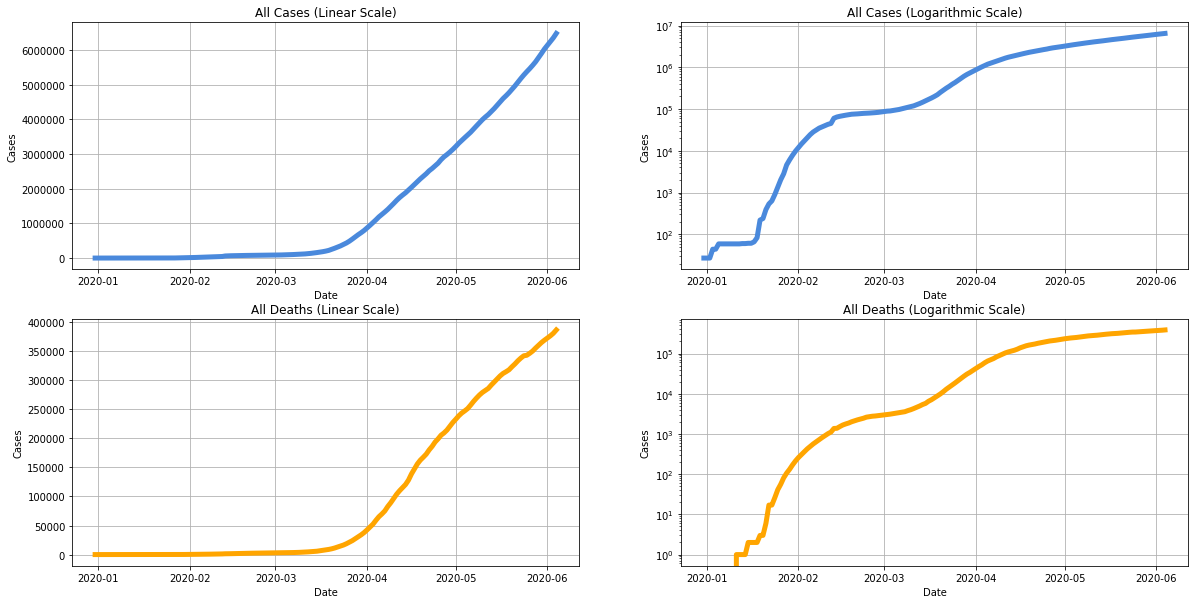

In [12]:
dailyTotal = []
deathTotal = []
daysList = df['dateRep'].unique()

for d in daysList:
    df_temp = df[df['dateRep']==d]
    totCases = sum(df_temp['Total Cases'])
    dailyTotal.append([d, totCases])
    total_deaths = sum(df_temp['Total Deaths'])
    deathTotal.append([d, total_deaths])

print("Total Cases: "+str(dailyTotal[0][1]))
print("Total Deaths: "+str(deathTotal[0][1]))
def myFunc(e):
    return e[0]

dailyTotal.sort(key=myFunc)
deathTotal.sort(key=myFunc)

daysC = []
valsC = []
for d in dailyTotal:
    daysC.append(d[0])
    valsC.append(d[1])
    
daysD = []
valsD = []
for d in deathTotal:
    daysD.append(d[0])
    valsD.append(d[1])
    
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
ax0.plot(daysC, valsC, linewidth=5)
ax0.set_title('All Cases (Linear Scale)')
ax0.set_ylabel('Cases')
ax0.set_xlabel('Date')
ax0.grid()

ax1.plot(daysC, valsC, linewidth=5)
ax1.set_title('All Cases (Logarithmic Scale)')
ax1.set_yscale('log')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.grid()

ax2.plot(daysD, valsD, linewidth=5, color='orange')
ax2.set_title('All Deaths (Linear Scale)')
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.grid()

ax3.plot(daysD, valsD, linewidth=5, color='orange')
ax3.set_title('All Deaths (Logarithmic Scale)')
ax3.set_yscale('log')
ax3.set_ylabel('Cases')
ax3.set_xlabel('Date')
ax3.grid()

fig.set_figwidth(20)
fig.set_figheight(10)
fig.savefig('images/Cases and Deaths')

In [13]:
high_new_cases = current_totals.sort_values(by='New Case %', ascending=False)
high_new_cases.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Total Cases,Total Deaths,Cases/1M Pop,Deaths/1M Pop,Deaths/Case,New Case %,New Death %,New Case/1M Pop,New Death/1M Pop
18626,2020-06-04,4,6,2020,20,0,Suriname,SR,SUR,575991.0,America,74,1,128.474230,1.736138,0.013514,37.037037,0.000000,34.722765,0.000000
9632,2020-06-04,4,6,2020,781,21,Iraq,IQ,IRQ,38433600.0,Asia,8168,256,212.522376,6.660838,0.031342,10.572628,8.936170,20.320761,0.546397
6582,2020-06-04,4,6,2020,142,3,Ethiopia,ET,ETH,109224559.0,Africa,1486,17,13.604999,0.155643,0.011440,10.565476,21.428571,1.300074,0.027466
13716,2020-06-04,4,6,2020,201,1,Nepal,NP,NPL,28087871.0,Asia,2300,9,81.885879,0.320423,0.003913,9.575989,12.500000,7.156114,0.035603
21263,2020-06-04,4,6,2020,16,0,Zimbabwe,ZW,ZWE,14439018.0,Africa,222,4,15.375007,0.277027,0.018018,7.766990,0.000000,1.108109,0.000000
11625,2020-06-04,4,6,2020,14,0,Libya,LY,LBY,6678567.0,Africa,196,5,29.347613,0.748664,0.025510,7.692308,0.000000,2.096258,0.000000
12081,2020-06-04,4,6,2020,63,0,Madagascar,MG,MDG,26262368.0,Africa,908,6,34.574186,0.228464,0.006608,7.455621,0.000000,2.398870,0.000000
20854,2020-06-04,4,6,2020,133,2,Venezuela,VE,VEN,28870195.0,America,1952,20,67.612983,0.692756,0.010246,7.311710,11.111111,4.606827,0.069276
10896,2020-06-04,4,6,2020,75,0,Kosovo,XK,XKX,1845300.0,Europe,1142,30,618.869561,16.257519,0.026270,7.029053,0.000000,40.643798,0.000000
15063,2020-06-04,4,6,2020,4801,82,Pakistan,PK,PAK,212215030.0,Asia,85264,1770,401.781156,8.340597,0.020759,5.966718,4.857820,22.623280,0.386401


### Total Cases Pie Chart

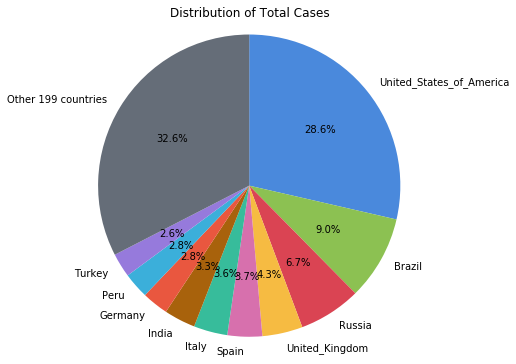

[1851520, 584016, 432277, 279856, 240720, 233836, 216919, 182764, 178914, 166422, 2108098]


In [14]:
# total cases pie chart
pie_df = current_totals[['countriesAndTerritories', 'Total Cases']]
pie_df = pie_df.sort_values(by=['Total Cases'], ascending=False)

values = pie_df['Total Cases'][:10].tolist()
labels = pie_df['countriesAndTerritories'][:10].tolist()
rest = pie_df[10:].sum(axis = 0, skipna = True)[1]
count = pie_df[10:].count(axis = 0)[1]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Cases')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Cases')

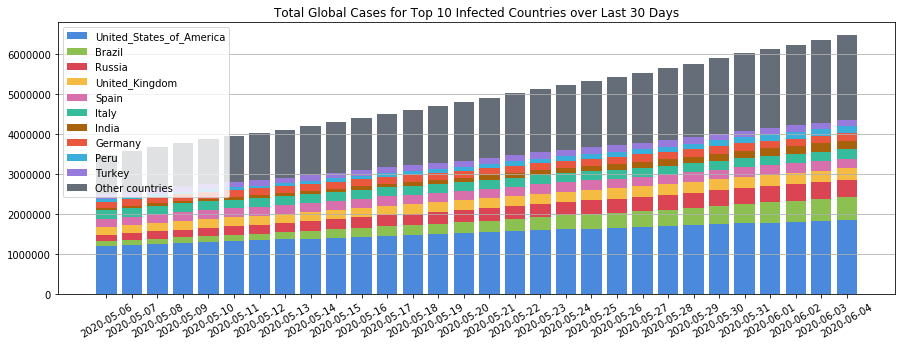

In [15]:
num_charts = 30
recent_date = df['dateRep'][0] 

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recent_date]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()
# print(labels)

dates = []

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    dates.append(str(day.date()))
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Cases']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Cases']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Cases for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)

fig = plt.gcf()
# ax.get_yaxis().set_major_formatter(
#     mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Cases Over Previous X Days')

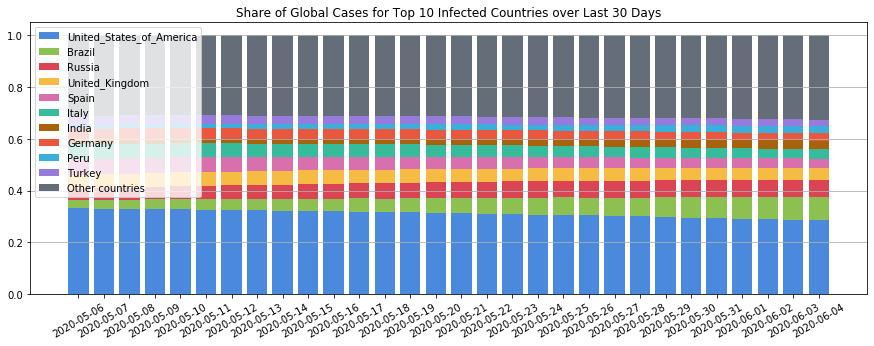

In [16]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recent_date]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

dates=[]

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    dates.append(str(day.date()))
    recent = df[df['dateRep']==day]
    
    totCases = sum(recent['Total Cases'])
    topCases = 0
    current_totals = recent[['countriesAndTerritories', 'Total Cases']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Cases']].values[0][0]
        except IndexError:
            temp = 0;
        topCases += temp
        values.append(temp/totCases)

    current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
    rest = totCases-topCases
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest/totCases)
    
    col_num=0
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom, color=color_list[col_num])
        bottom+=val
        col_num+=1

    day_back +=1

#x-axis labels
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Share of Global Cases for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels, loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Share of Total Cases Over Top 10')

### Daily Infection/Country
Graphing the top X most infected countries daily infections over the last X days, so we can see a trend about which countires are becoming more infected

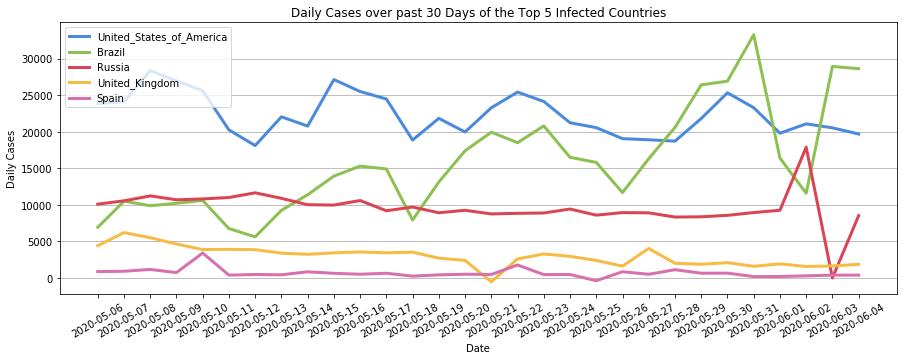

In [17]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
# data = np.arange(days)

for c in top5:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['cases']))
    plt.plot(data, df_nation['cases'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Daily Cases over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Cases of Top 10 Infected Countries')

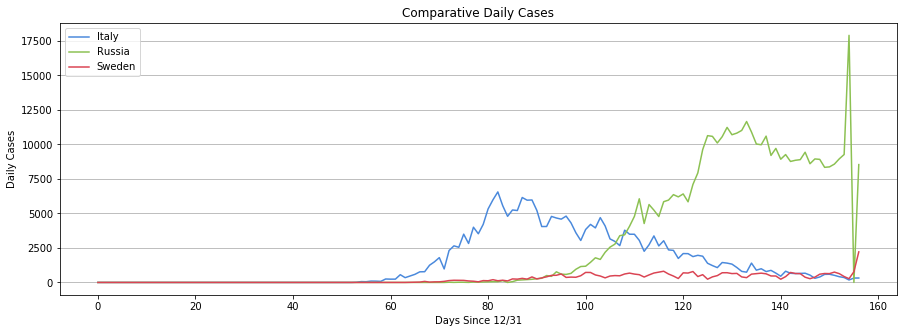

In [18]:
pick = [
    'Italy', 
#     'United_States_of_America',
    'Russia',
    'Sweden'
    ]

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, current_totals['cases'], label=c)

plt.title("Comparative Daily Cases")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

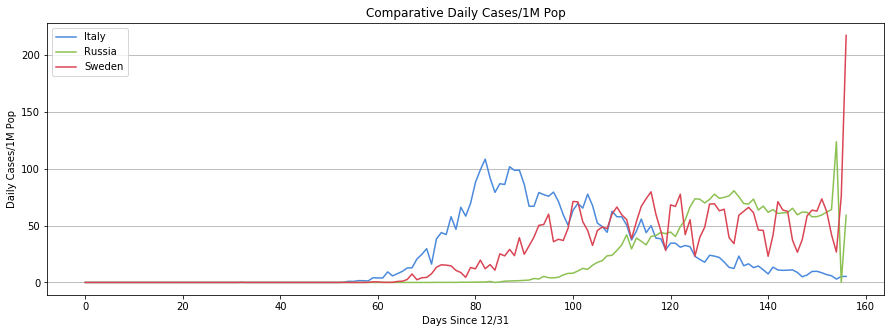

In [19]:
pick = [
    'Italy', 
#     'United_States_of_America',
    'Russia',
    'Sweden'
    ]

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, (current_totals['cases']/current_totals['popData2018'])*1000000, label=c)

plt.title("Comparative Daily Cases/1M Pop")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases/1M Pop")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

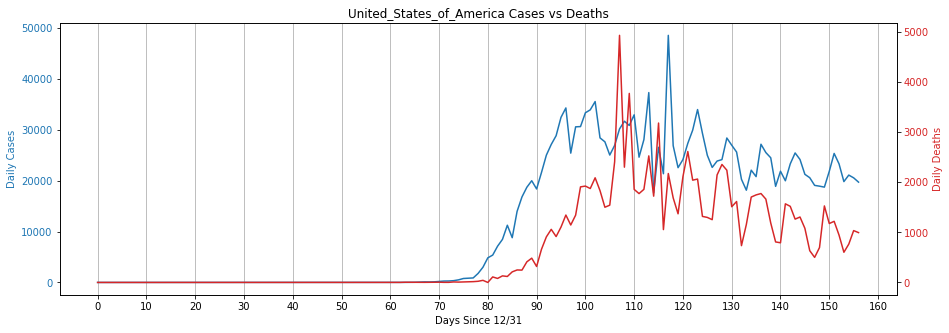

In [20]:
pick = 'United_States_of_America' 
#'United_States_of_America' #'Italy' #'Spain' #'Germany' #'France' #'Iran' #'United_Kingdom' #'Sweden'

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

#reset global variables
current_totals = df[df['countriesAndTerritories']==pick]
data = np.arange(len(current_totals['dateRep']))
current_totals = current_totals.iloc[::-1] #reverse the order
current_totals = current_totals.reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
plt.grid(axis='x')

color = 'tab:blue'
ax1.set_xlabel('Days Since 12/31')
ax1.set_ylabel('Daily Cases', color=color)
ax1.plot(data, current_totals['cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Daily Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(data, current_totals['deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MultipleLocator(10))
plt.title(pick+" Cases vs Deaths")
plt.show()

fig.savefig('images/Comparing Cases vs Deaths')

### Increase in Cases

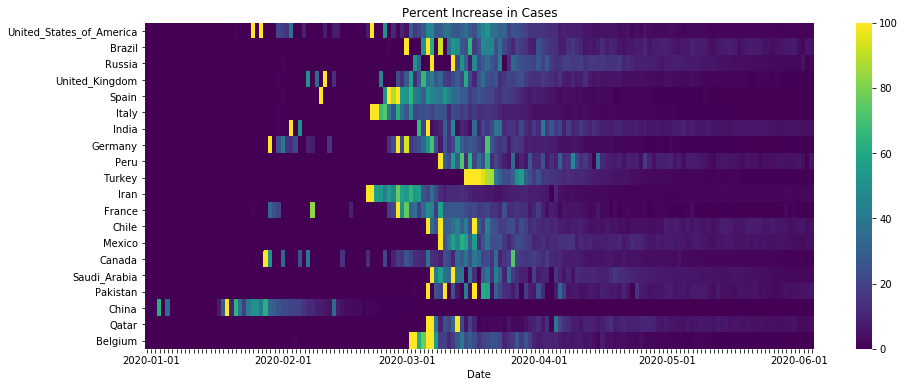

In [21]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Cases of Top X Infected Countries')

### Infection/Population

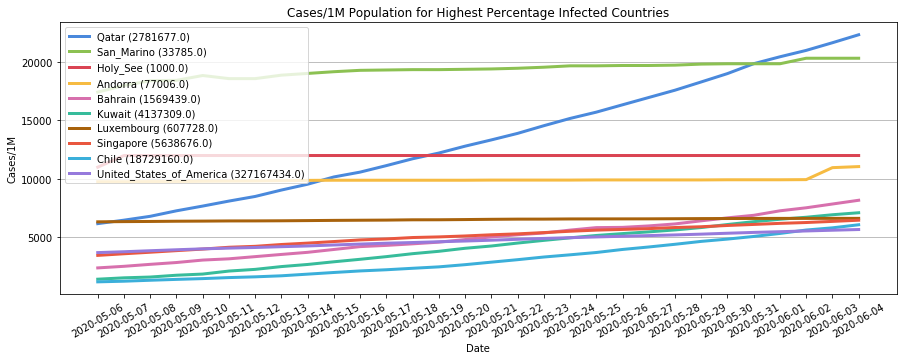

In [22]:
days = 30
top = 10

labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Cases/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c+" ("+str(df_temp['popData2018'].values[-1])+")", linewidth=3)
    
#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population for Highest Percentage Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Infection Rates')

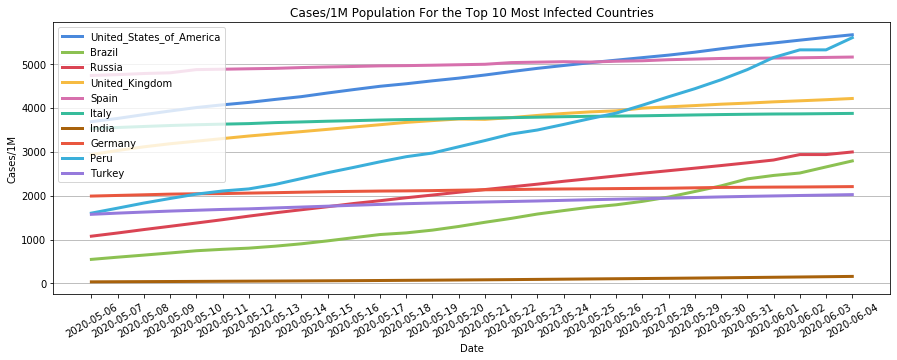

In [23]:
days = 30
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:top].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Infection Rates of Top 10')

### Total Cases by Days Since First Infection Reported
In this cell, I am attempting to show the spread of the virus in each country since an infection was first reported. This will allow people to see how fast the infection is spreading in each country relative to the infection instead of having each country staggered.

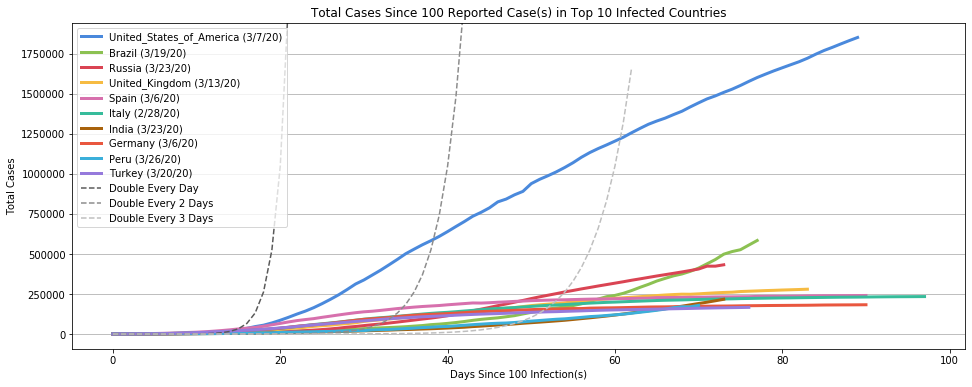

In [24]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Cases'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')

# plt.ylim(bottom, top)     # set the ylim to bottom, top
# plt.xlim(left, right)     # set the xlim to left, right

plt.legend()
plt.title("Total Cases Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Total Cases")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Total Infections Since X Cases')

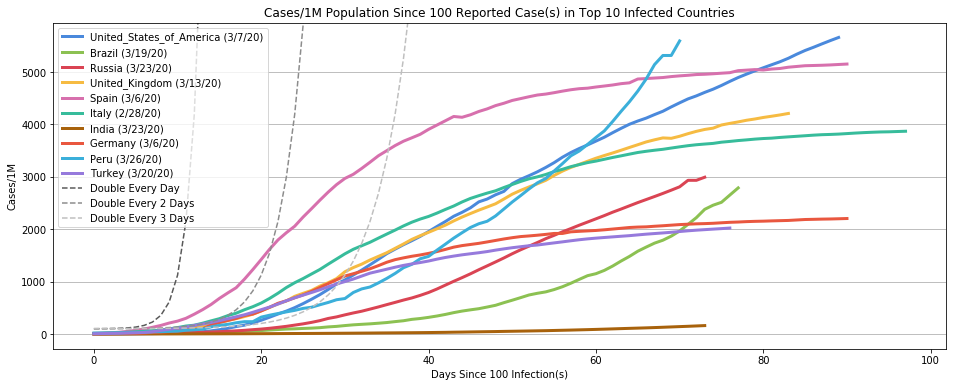

In [25]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Cases/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')


plt.legend()
plt.title("Cases/1M Population Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Cases/1M")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top
plt.show()

fig.savefig('images/Cases per 1M Population since X Reported Case(s)')

In [26]:
def getKey(df):
    return df[1]

In [27]:
first_infected = []
for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>0].tail(1) #grab the first date of the infection
    if(day1.empty==False):
        first_infected.append([c, day1.iloc[0]['dateRep']])
first_infected = sorted(first_infected, key=getKey)
print(len(first_infected))
first_infected

210


[['China', Timestamp('2019-12-31 00:00:00')],
 ['Thailand', Timestamp('2020-01-13 00:00:00')],
 ['Japan', Timestamp('2020-01-15 00:00:00')],
 ['South_Korea', Timestamp('2020-01-20 00:00:00')],
 ['Taiwan', Timestamp('2020-01-21 00:00:00')],
 ['United_States_of_America', Timestamp('2020-01-21 00:00:00')],
 ['Singapore', Timestamp('2020-01-24 00:00:00')],
 ['Vietnam', Timestamp('2020-01-24 00:00:00')],
 ['Australia', Timestamp('2020-01-25 00:00:00')],
 ['France', Timestamp('2020-01-25 00:00:00')],
 ['Malaysia', Timestamp('2020-01-25 00:00:00')],
 ['Nepal', Timestamp('2020-01-25 00:00:00')],
 ['Canada', Timestamp('2020-01-26 00:00:00')],
 ['United_Arab_Emirates', Timestamp('2020-01-27 00:00:00')],
 ['Cambodia', Timestamp('2020-01-28 00:00:00')],
 ['Germany', Timestamp('2020-01-28 00:00:00')],
 ['Sri_Lanka', Timestamp('2020-01-28 00:00:00')],
 ['Finland', Timestamp('2020-01-30 00:00:00')],
 ['India', Timestamp('2020-01-30 00:00:00')],
 ['Philippines', Timestamp('2020-01-30 00:00:00')],
 ['I

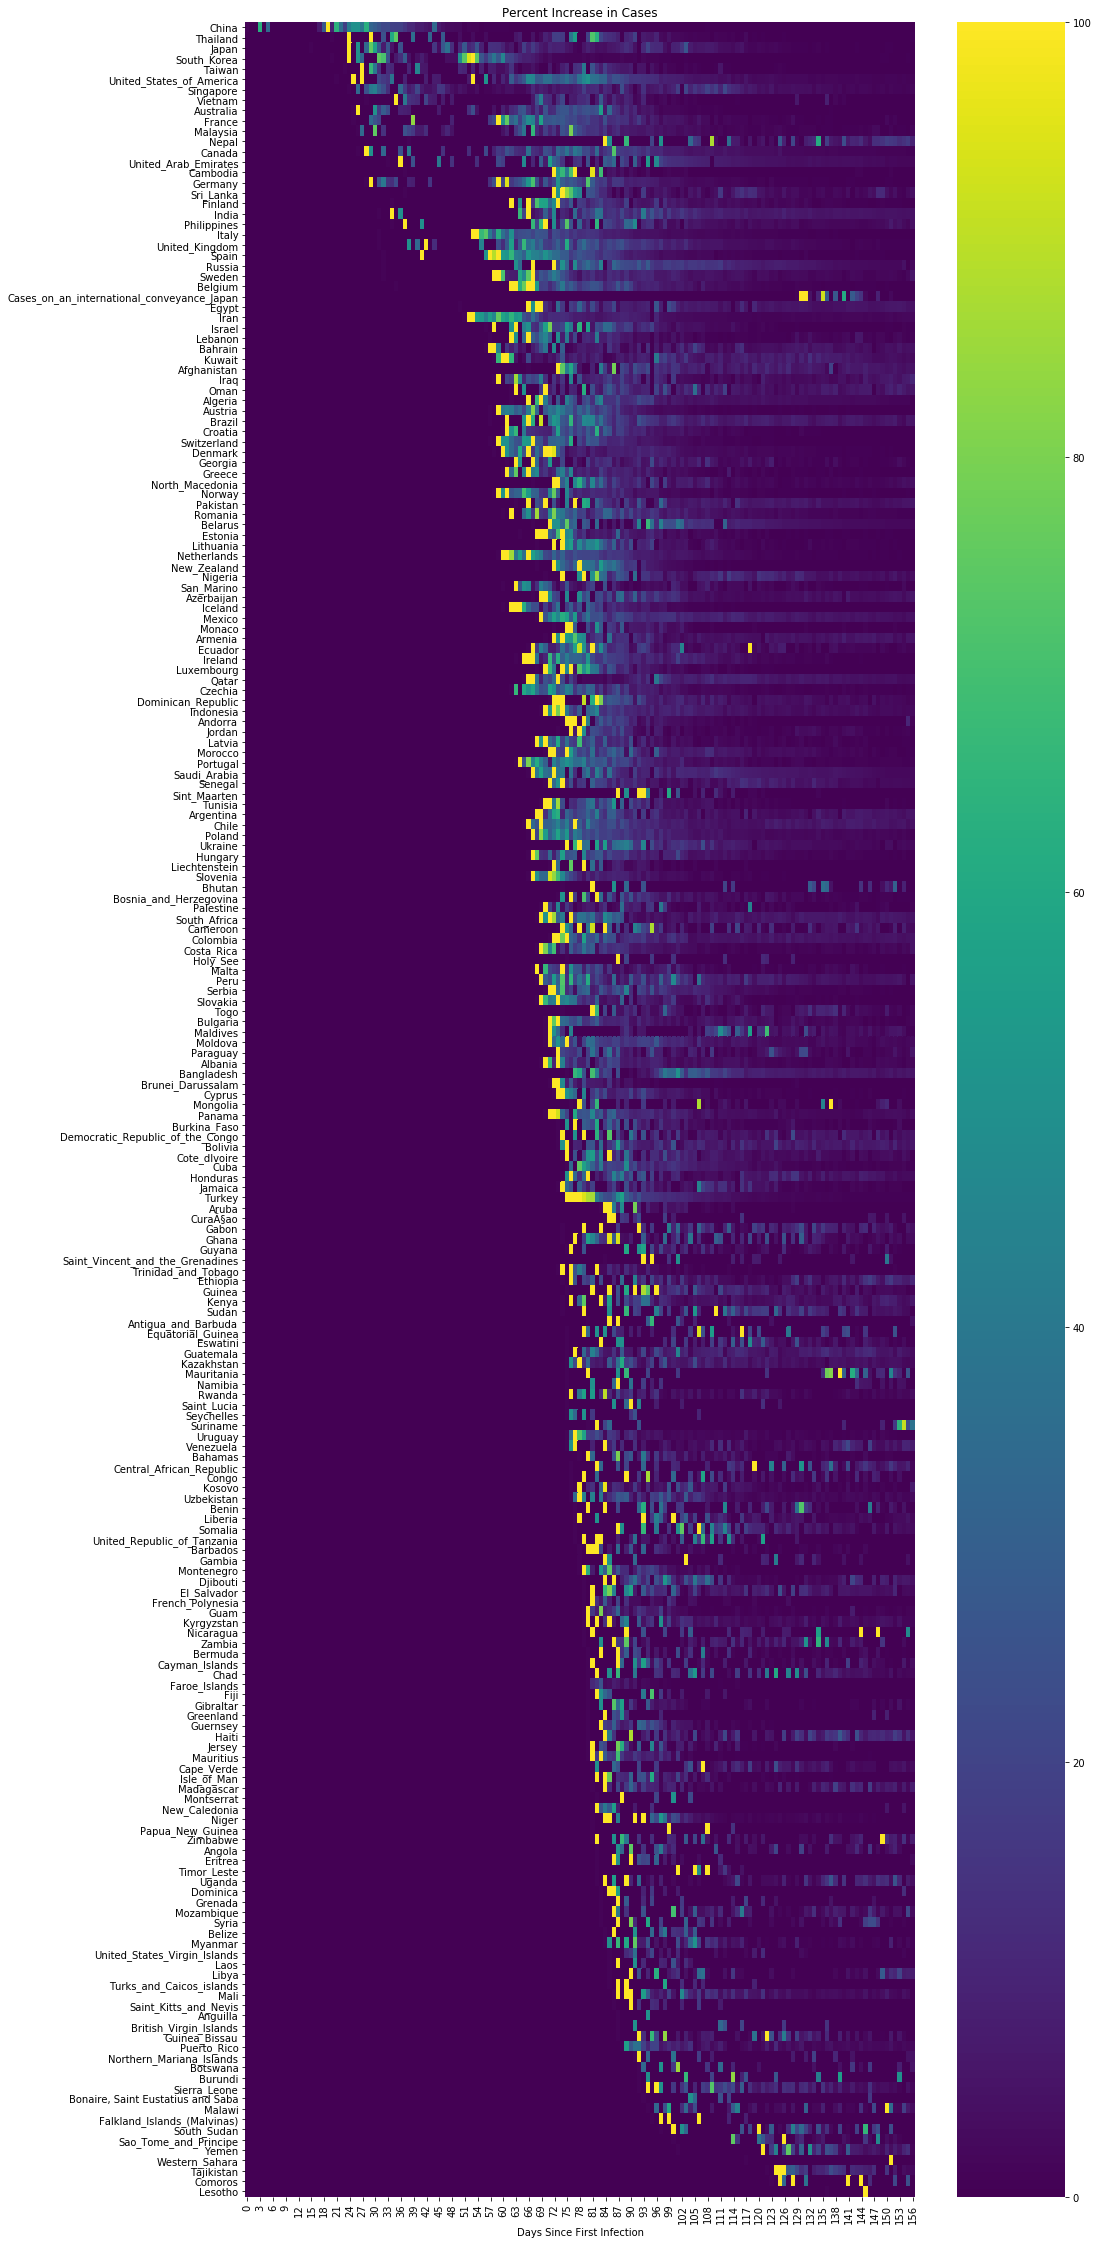

In [28]:
days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in first_infected:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

fig, ax = plt.subplots(figsize=(15,40))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels)#, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/All Case Infections')

# Death Data
This section will show the same information as above, but focus on deaths instead of total cases

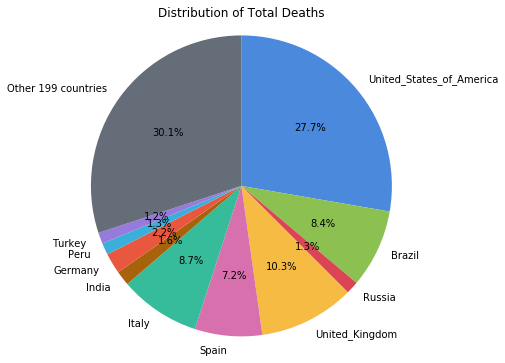

[107175, 32548, 5215, 39728, 27940, 33601, 6075, 8581, 4894, 4609, 116171]


In [29]:
# total deaths pie chart
recent = df[df['dateRep']==recentNationDate()]

current_totals = recent[['countriesAndTerritories', 'Total Cases', 'Total Deaths']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
current_totals.head()

values = current_totals['Total Deaths'][:10].tolist()
labels = current_totals['countriesAndTerritories'][:10].tolist()
rest = current_totals[10:].sum(axis = 0, skipna = True)[2]
count = current_totals[10:].count(axis = 0)[2]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Deaths')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


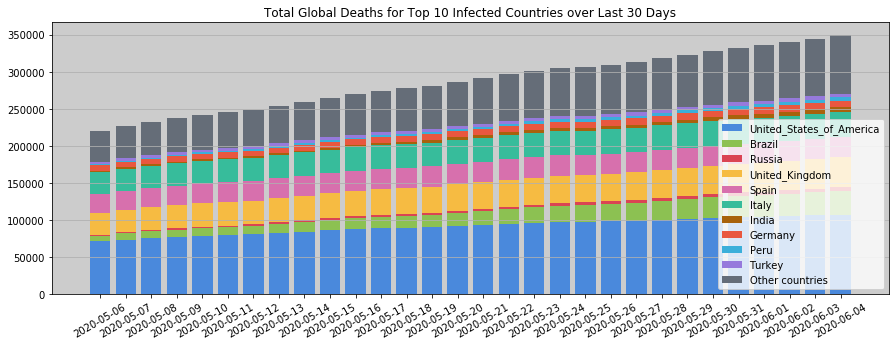

In [30]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recentNationDate()]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Deaths']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Deaths']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Deaths'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    
    day_back +=1

#x-axis labels
dates = []
x_lab = df['dateRep'][:num_charts]
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Deaths for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)


#background color
ax = plt.axes()
ax.set_facecolor("0.8")

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Deaths Over Previous X Days')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


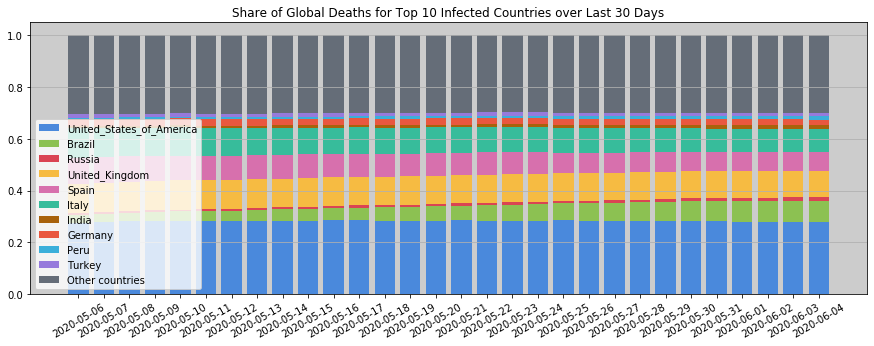

In [31]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recentNationDate()]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = df[df['dateRep']==day]
    
    totCases = sum(recent['Total Deaths'])
    topCases = 0
    current_totals = recent[['countriesAndTerritories', 'Total Deaths']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Deaths']].values[0][0]
        except IndexError:
            temp = 0;
        topCases += temp
        values.append(temp/totCases)

    current_totals = current_totals.sort_values(by=['Total Deaths'], ascending=False)
    rest = totCases-topCases
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest/totCases)
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val

    day_back +=1

#x-axis labels
dates = []
x_lab = df['dateRep'][:num_charts]
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Share of Global Deaths for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

#labels
labels.append('Other countries')
plt.legend(labels, loc='lower left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Share of Total Deaths Over Top 10')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


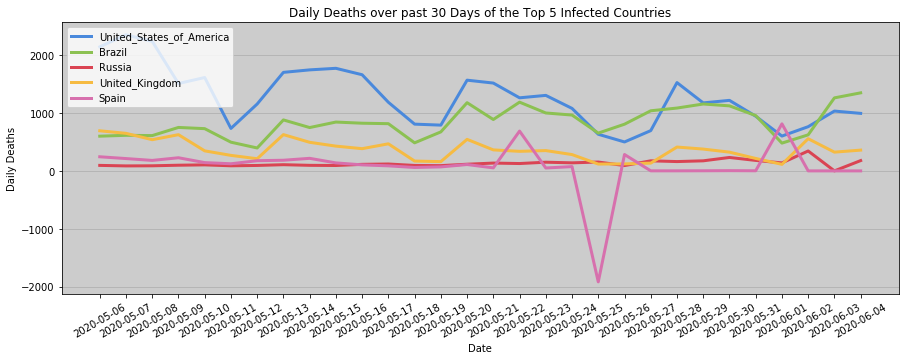

In [32]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
data = np.arange(days)

for c in top5:
    df_nation=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['deaths']))
    plt.plot(data, df_nation['deaths'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.title("Daily Deaths over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Deaths")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Deaths of Top 10 Infected Countries')

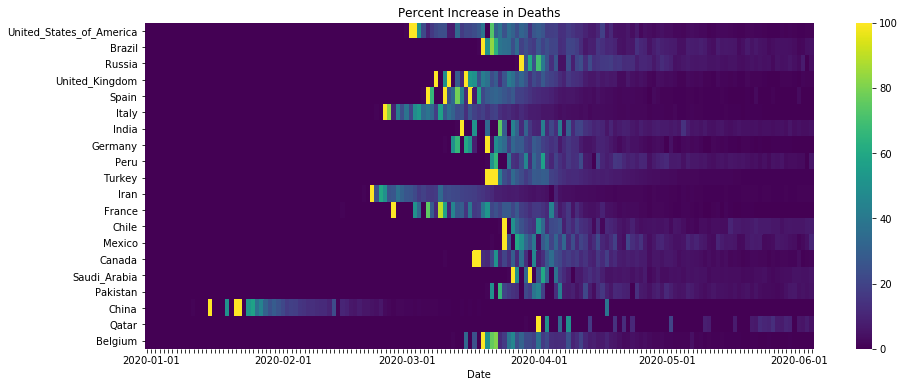

In [33]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values


days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep']
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['New Death %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

lastLabels = lastLabels[::-1]
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=100, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Deaths')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Deaths of Top X Infected Countries')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


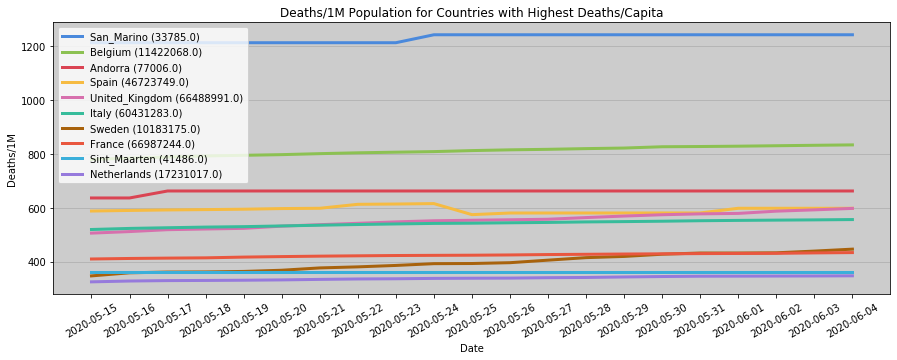

In [34]:
days = 21
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Deaths/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c+" ("+str(df_temp['popData2018'].values[-1])+")", linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")    

plt.title("Deaths/1M Population for Countries with Highest Deaths/Capita")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Death Rates')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


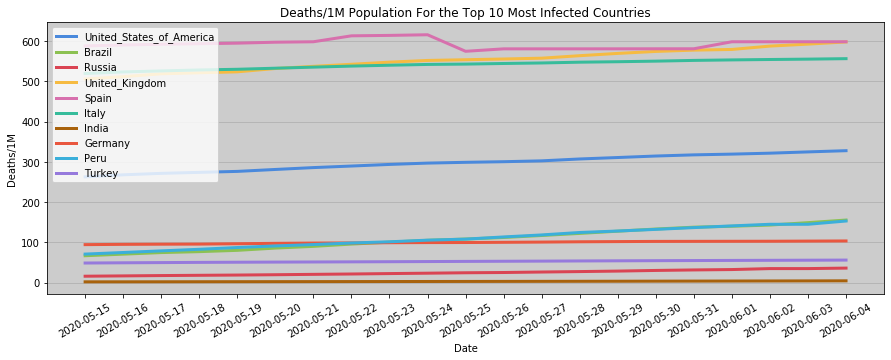

In [35]:
days = 21

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:10].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")
    
plt.title("Deaths/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Death Rates of Top 10')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


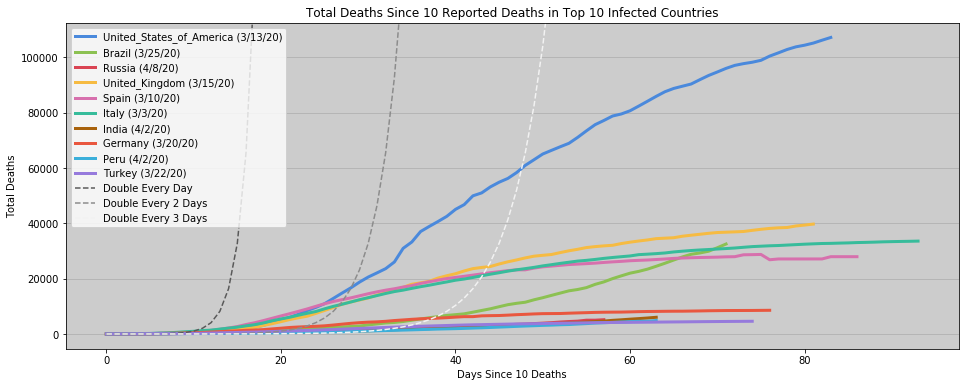

In [36]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Deaths'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Total Deaths Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Total Deaths")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top

plt.show()

fig.savefig('images/Total Deaths Since X Reported Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


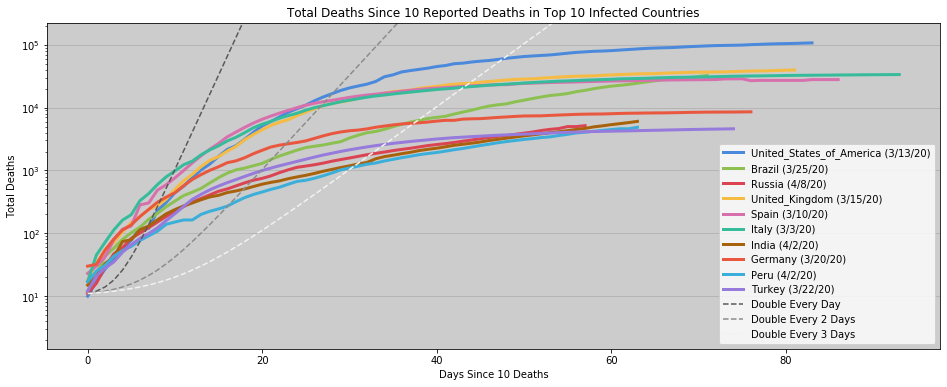

In [37]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Deaths'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Total Deaths Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Total Deaths")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.yscale('log')
plt.grid(axis='y')
plt.ylim(top, bottom*2)     # set the ylim to bottom, top

plt.show()

fig.savefig('images/Total Deaths Since X Reported Deaths (Log)')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


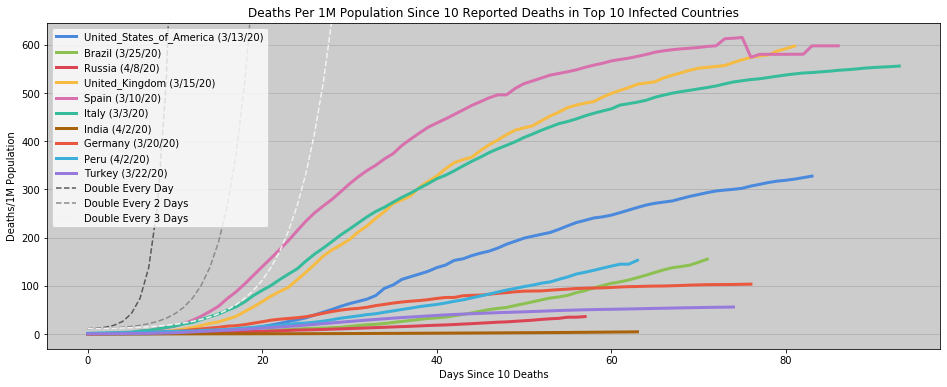

In [38]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
#     df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Deaths/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Deaths Per 1M Population Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Deaths/1M Population")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Deaths Per 1M Population Since X Reported Deaths')

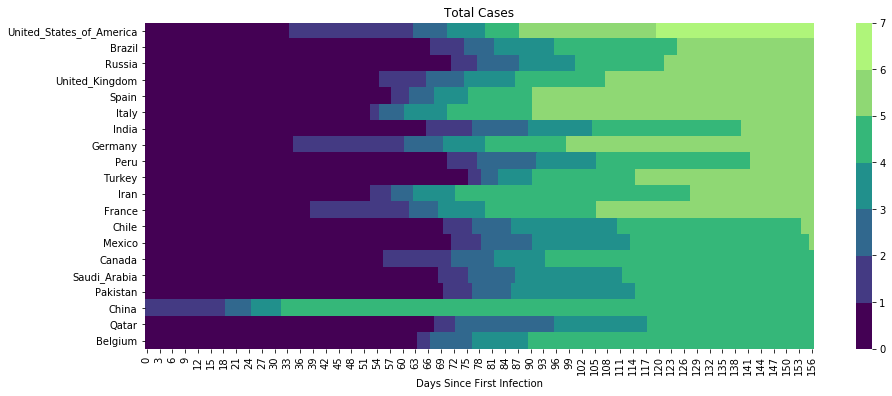

In [39]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Cases'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Categorical Heat Map')

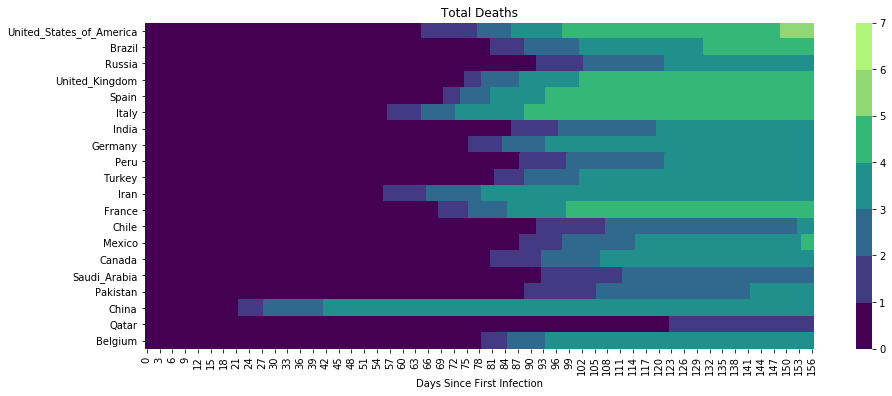

In [40]:
top = 20

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Deaths'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Deaths')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Deaths Categorical Heat Map')

# State Data
This next section will focus on creating insights for individual US states. I am using this data base:
- Case Data: https://covidtracking.com/api/states.csv
- Census Data: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

to pull my data, which updates freqently (the website says it updates every few minutes, from my experience it updates daily)

In [41]:
states = pd.read_csv('http://covidtracking.com/api/states/daily.csv',
                    parse_dates=['dateChecked', 'date'])

# print(states.columns)

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
statePop = pd.read_csv(url, encoding='ISO-8859-1')
statePop = statePop[statePop['SUMLEV']==40]
statePop = statePop[['STATE', 'POPESTIMATE2019']]
states = pd.merge(states, statePop, left_on='fips', right_on='STATE')

states['test percent']= (states['positive']/(states['positive']+states['negative']))*100
states['cases/1M']= states['positive']/states['POPESTIMATE2019']*1000000
states['deaths/1M']= states['death']/states['POPESTIMATE2019']*1000000
states = states.drop(['STATE'], axis=1)

states['new case %']=states['positiveIncrease']/states['positive']
states['new death %']=states['deathIncrease']/states['death']

#this drops all the hospital data, which is currently not used...
states['population'] = states['POPESTIMATE2019']
all_state_data = states
print(all_state_data.columns)
states = states[['date', 'fips', 'state', 'population', 'positive', 'negative', 'total', 'death', 'positiveIncrease', 'deathIncrease', 'test percent', 'cases/1M', 'deaths/1M', 'new case %', 'new death %']]

#feature engineering
states['new cases/1M'] = states['positiveIncrease']/states['population']*1000000
states['new deaths/1M'] = states['deathIncrease']/states['population']*1000000

states.head()

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'POPESTIMATE2019', 'test percent', 'cases/1M', 'deaths/1M',
       'new case %', 'new death %', 'population'],
      dtype='object')


/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %,new cases/1M,new deaths/1M
0,2020-06-03,2,AK,731545,505.0,57677.0,58182,10.0,18,0,0.867966,690.319803,13.669699,0.035644,0.0,24.605458,0.0
1,2020-06-02,2,AK,731545,487.0,55716.0,56203,10.0,20,0,0.866502,665.714344,13.669699,0.041068,0.0,27.339398,0.0
2,2020-06-01,2,AK,731545,467.0,53723.0,54190,10.0,33,0,0.861783,638.374946,13.669699,0.070664,0.0,45.110007,0.0
3,2020-05-31,2,AK,731545,434.0,51261.0,51695,10.0,0,0,0.839540,593.264939,13.669699,0.000000,0.0,0.000000,0.0
4,2020-05-30,2,AK,731545,434.0,51261.0,51695,10.0,4,0,0.839540,593.264939,13.669699,0.009217,0.0,5.467880,0.0


In [42]:
def recentStateDate():
    return states['date'][:1].values[0]

In [43]:
#gather the top 10 infected states
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by=['positive'], ascending=False)
recentStates.set_index('date', inplace=True)
recentStates

,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %,new cases/1M,new deaths/1M
date,,,,,,,,,,,,,,,,
2020-06-03,36,NY,19453561,374085.0,1855388.0,2229473,24079.0,1045,56,16.779077,19229.641298,1237.768242,0.002793,0.002326,53.717672,2.878650
2020-06-03,34,NJ,8882190,162068.0,675352.0,837420,11880.0,523,110,19.353252,18246.400944,1337.507979,0.003227,0.009259,58.881875,12.384333
2020-06-03,17,IL,12671821,123830.0,835345.0,959175,5621.0,982,96,12.910053,9772.076168,443.582655,0.007930,0.017079,77.494782,7.575865
2020-06-03,6,CA,39512223,117687.0,2013607.0,2131294,4361.0,2377,75,5.521857,2978.496047,110.370910,0.020198,0.017198,60.158600,1.898147
2020-06-03,25,MA,6892503,101592.0,516169.0,617761,7152.0,429,67,16.445195,14739.493040,1037.649168,0.004223,0.009368,62.241540,9.720707
2020-06-03,42,PA,12801989,74022.0,401369.0,475391,5741.0,512,74,15.570762,5782.070270,448.445941,0.006917,0.012890,39.993785,5.780352
2020-06-03,48,TX,28995881,68271.0,938497.0,1006768,1734.0,1703,36,6.781205,2354.506835,59.801597,0.024945,0.020761,58.732480,1.241556
2020-06-03,12,FL,21477737,58764.0,1022149.0,1082104,2650.0,1317,37,5.436515,2736.042442,123.383576,0.022412,0.013962,61.319309,1.722714
2020-06-03,26,MI,9986857,58035.0,535514.0,593549,5570.0,304,17,9.777626,5811.137578,557.733029,0.005238,0.003052,30.440007,1.702237


In [44]:
print("Average Cases/State: "+str(stat.mean(recentStates['positive'].values.tolist())))
print("Median Cases/State: "+str(stat.median(recentStates['positive'].values.tolist())))

state_avg = stat.mean(recentStates['positive'].values.tolist())
state_median = stat.median(recentStates['positive'].values.tolist())

Average Cases/State: 36059.23529411765
Median Cases/State: 16322.0


### State Infection

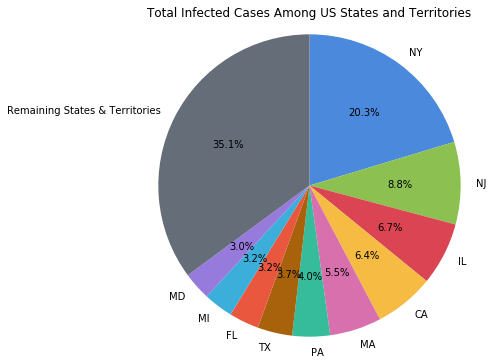

In [45]:
#pie chart
count=0

state_values = recentStates['positive'][:10].values.tolist()
state_labels = recentStates['state'][:10].values.tolist()
rest_states_values = recentStates['positive'][10:].values.tolist()

for c in rest_states_values:
    if math.isnan(c) == False:
        count+=c

state_values.append(count)
state_labels.append("Remaining States & Territories")

plt.pie(state_values, labels=state_labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Infected Cases Among US States and Territories')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

fig.savefig('images/Infected Cases Among States')

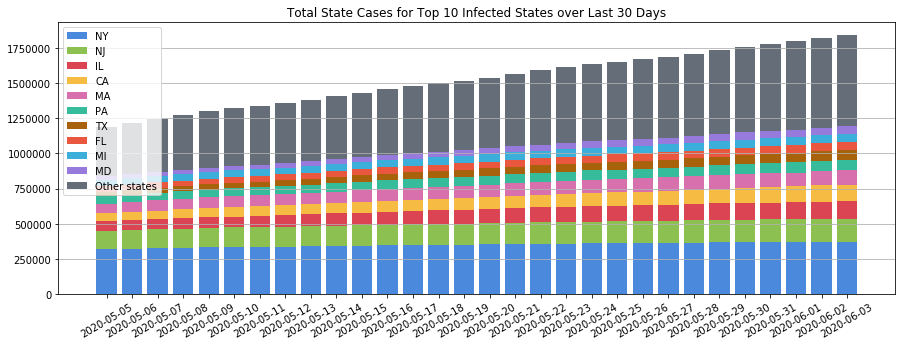

In [46]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)
recent_date = recentStates.index.tolist()[0]

#state labels
recent = states[states['date']==recentStateDate()]
recent = recent.sort_values(by=['positive'], ascending=False)
labels = recent['state'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = states[states['date']==day]
    
    current_totals = recent[['state', 'positive']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['state']==c,['positive']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['positive'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates = []
x_lab = states['date'][:num_charts] #fix xlab
# print(x_lab)
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total State Cases for Top 10 Infected States over Last '+str(num_charts)+' Days')

#labels
labels.append('Other states')
plt.legend(labels)

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 State Cases Over Previous X Days')

### Per Capita Infections

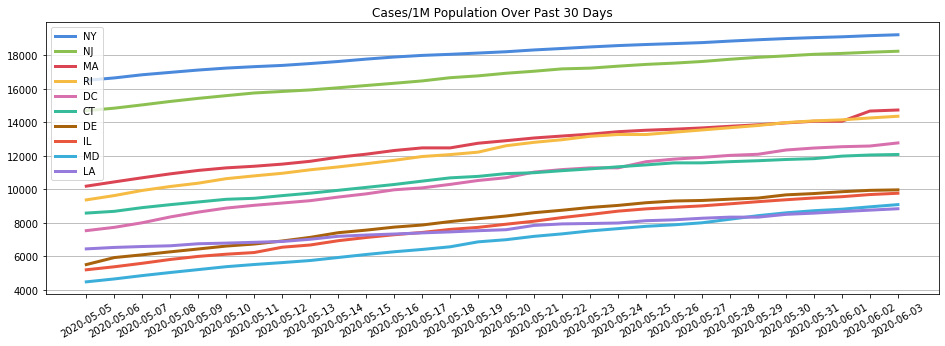

In [47]:
n_days = 30
recentStates = recentStates.sort_values(by=['cases/1M'], ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['cases/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['cases/1M'].values.tolist()[:n_days])

#graph
plt.legend()
plt.title('Cases/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Cases Per 1M Over Time')

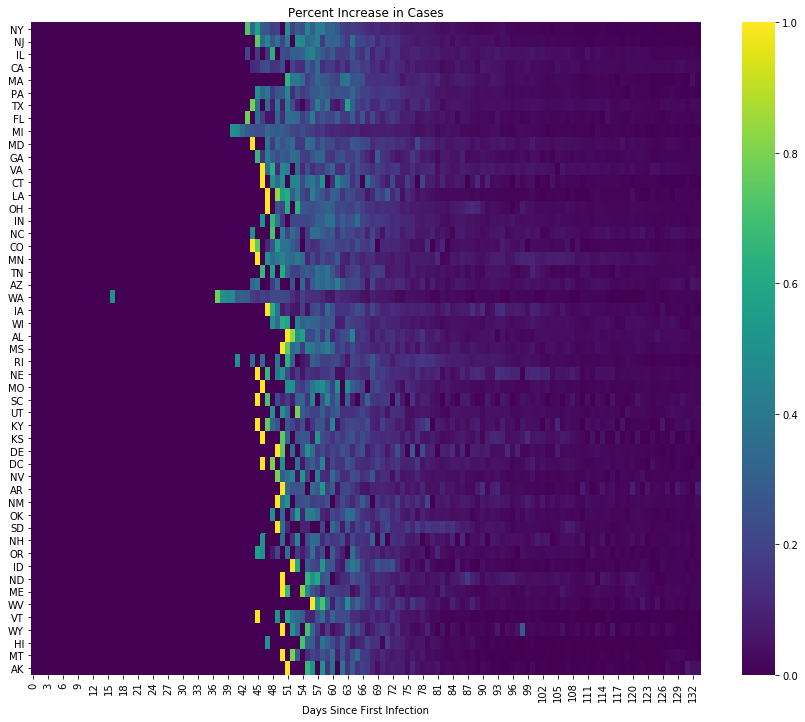

In [48]:
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='positive', ascending=False).state

days = len(states[states.state=='WA'].index)
dayLabels = states[states.state=='WA'].date.tolist()
dayLabels
vals = []
labels = []

for c in recentStates:
    dfState = states[states['state']==c]
    inc = np.array(dfState['new case %'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c)
    
vals = pd.DataFrame(vals)

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(vals, cmap='viridis', vmin=0, vmax=1, yticklabels=labels, square=False)#, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/All State Infections')

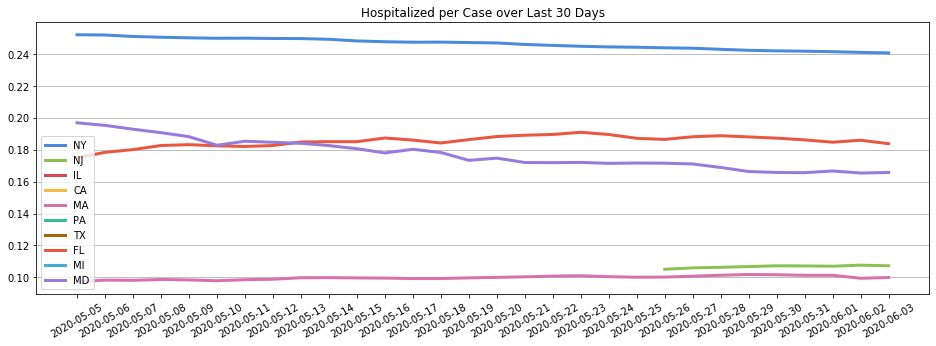

In [49]:
n_days = 30
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='positive', ascending=False).state[:10]

for s in recentStates:
    dfState = all_state_data[all_state_data['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    data = dfState['hospitalized'].values/dfState['positive'].values
    plt.plot(data, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['positive'].values.tolist()[:n_days])

#graph
plt.legend()
plt.title('Hospitalized per Case over Last '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Hospitalized Per Case Over Time')

### Per Capita Deaths

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


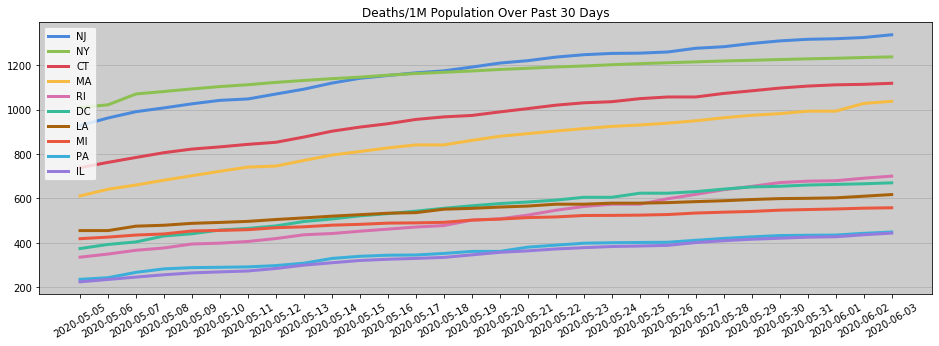

In [50]:
n_days = 30

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='deaths/1M', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['deaths/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['deaths/1M'].values.tolist()[:n_days])

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

#graph
plt.legend()
plt.title('Deaths/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Deaths Per 1M Over Time')

### Positive Testing Rate

In [51]:
pick_state = 'NJ'

states.head()
test = states[states['state']==pick_state]
test.head(14)

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,test percent,cases/1M,deaths/1M,new case %,new death %,new cases/1M,new deaths/1M
2797,2020-06-03,34,NJ,8882190,162068.0,675352.0,837420,11880.0,523,110,19.353252,18246.400944,1337.507979,0.003227,0.009259,58.881875,12.384333
2798,2020-06-02,34,NJ,8882190,161545.0,656132.0,817677,11770.0,627,49,19.756579,18187.519069,1325.123646,0.003881,0.004163,70.590699,5.516657
2799,2020-06-01,34,NJ,8882190,160918.0,634682.0,795600,11721.0,473,23,20.225993,18116.928370,1319.606989,0.002939,0.001962,53.252633,2.589451
2800,2020-05-31,34,NJ,8882190,160445.0,585700.0,746145,11698.0,837,64,21.503193,18063.675738,1317.017537,0.005217,0.005471,94.233517,7.205430
2801,2020-05-30,34,NJ,8882190,159608.0,585700.0,745308,11634.0,764,103,21.415039,17969.442221,1309.812107,0.004787,0.008853,86.014823,11.596239
2802,2020-05-29,34,NJ,8882190,158844.0,557567.0,716411,11531.0,1029,130,22.172189,17883.427398,1298.215868,0.006478,0.011274,115.849807,14.636030
2803,2020-05-28,34,NJ,8882190,157815.0,528042.0,685857,11401.0,1187,62,23.009899,17767.577591,1283.579838,0.007521,0.005438,133.638213,6.980260
2804,2020-05-27,34,NJ,8882190,156628.0,503697.0,660325,11339.0,864,148,23.719835,17633.939378,1276.599577,0.005516,0.013052,97.273308,16.662557
2805,2020-05-26,34,NJ,8882190,155764.0,480128.0,635892,11191.0,672,47,24.495355,17536.666070,1259.937020,0.004314,0.004200,75.657017,5.291488
2806,2020-05-25,34,NJ,8882190,155092.0,468705.0,623797,11144.0,938,11,24.862575,17461.009053,1254.645532,0.006048,0.000987,105.604586,1.238433


In [52]:
recentStates = states[states['date']==recentStateDate()]

print("Total Tests Given: "+str(np.nansum(recentStates['total'])))
print("Total Positive: "+str(np.nansum(recentStates['positive'])))
print("Total Negative: "+str(np.nansum(recentStates['negative'])))

avg_percent = recentStates.mean(axis=0)
avg_percent = avg_percent['test percent']
txt = "Average Positive Testing Rate: {avg:.3f}%"
print(txt.format(avg = avg_percent))

Total Tests Given: 18198994
Total Positive: 1839021.0
Total Negative: 16356422.0
Average Positive Testing Rate: 8.505%


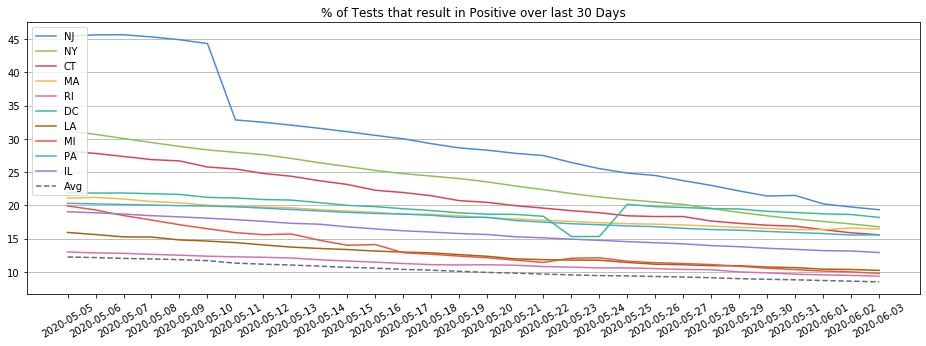

In [53]:
n_days = 30
top = 10

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='deaths/1M', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['test percent'].values, label=s)

#date labels
dates = []
for d in dfState.index.tolist()[:n_days]:
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['positive'].values.tolist()[:n_days])

#average for each day (create a variable for each day and then plot it like the rest)
avgs = []
for d in dfState['date'].tolist()[:n_days]:
    df_2 = states[states['date']==d]
    datastream = df_2['test percent']
    avg = stat.mean(datastream)
    avgs.append(avg)

avgs = avgs[::-1]
plt.plot(avgs, '--', label="Avg")

#graph
plt.legend(loc='upper left')
plt.title('% of Tests that result in Positive over last '+str(n_days)+' Days')
# plt.ylim(0,100)
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Percent Positive Testing In US States')

# Maps
This next section will focus on creating heat map visualizations of the infection on several levels based on different data bases:
 - World Data: using the ECDC database
 - State Data: using the COVID Tracking Project database
 - County Data: using the John Hopkins database
 

In [54]:
def mdy(date):
    month = date.month
    if(month<10): month = '0'+str(month)
    
    day = date.day
    if(day<10): day = '0'+str(day)
        
    year = date.year
    
    return str(month)+'-'+str(day)+'-'+str(year)

In [55]:
def daysBack(date, days):
    return date-timedelta(days=days)

In [56]:
def daysForward(date, days):
    return date+timedelta(days=days)

In [57]:
current_day = mdy(datetime.now())
prev_day = mdy(daysBack(datetime.now(), 1))
current_day

'06-04-2020'

In [58]:
try:
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+current_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})
except:
    print("WARNING, Data has not been updated...")
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+prev_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})

adjFip = []
for fip in county_data['FIPS']:
    if isinstance(fip, float) == False:
        if len(fip)==4: 
            fip = '0'+fip
    adjFip.append(fip)
county_data['FIPS']=adjFip

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
county_pop = pd.read_csv(url, encoding='ISO-8859-1',
                        dtype={"STATE": str,
                              "COUNTY": str})

countyInfo = county_pop[['STATE', 'COUNTY', 'POPESTIMATE2019', 'STNAME', 'CTYNAME']]
countyInfo['FIPS'] = countyInfo['STATE']+countyInfo['COUNTY']
county_data = pd.merge(county_data, countyInfo, on='FIPS')

county_data['Cases/1k Pop']=county_data['Confirmed']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/1k Pop']=county_data['Deaths']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/Case']=county_data['Deaths']/county_data['Confirmed']

county_data = county_data.dropna()
print(county_data['Last_Update'].tolist()[0])
county_data = county_data.drop(['STATE', 'COUNTY', 'Lat', 'Long_', 'Country_Region', 'STNAME', 'CTYNAME', 'Combined_Key', 'Last_Update', 'Case-Fatality_Ratio', 'Incidence_Rate'], axis=1)

WARNING, Data has not been updated...
2020-06-04 02:33:14


/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Top 10 Counties by Total Cases

In [59]:
county_data = county_data.sort_values(by='Confirmed', ascending=False)
county_data = county_data.reset_index(drop=True)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
1,17031,Cook,Illinois,80204,3780,0,76424,5150233,15.572888,0.733947,0.047130
2,06037,Los Angeles,California,58261,2489,0,55772,10039107,5.803405,0.247930,0.042722
3,36059,Nassau,New York,40644,2130,0,38514,1356924,29.953041,1.569727,0.052406
4,36103,Suffolk,New York,40062,1915,0,38147,1476601,27.131229,1.296897,0.047801
5,36119,Westchester,New York,33691,1381,0,32310,967506,34.822523,1.427381,0.040990
6,42101,Philadelphia,Pennsylvania,23160,1359,0,21801,1584064,14.620621,0.857920,0.058679
7,25017,Middlesex,Massachusetts,22403,1676,0,20727,1611699,13.900238,1.039896,0.074811
8,26163,Wayne,Michigan,20541,2479,0,18062,1749343,11.742123,1.417103,0.120685
9,34017,Hudson,New Jersey,18852,1192,0,17660,672391,28.037258,1.772778,0.063229


## Top 10 Counties by Total Deaths

In [60]:
county_data = county_data.sort_values(by='Deaths', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
1,17031,Cook,Illinois,80204,3780,0,76424,5150233,15.572888,0.733947,0.047130
2,06037,Los Angeles,California,58261,2489,0,55772,10039107,5.803405,0.247930,0.042722
8,26163,Wayne,Michigan,20541,2479,0,18062,1749343,11.742123,1.417103,0.120685
3,36059,Nassau,New York,40644,2130,0,38514,1356924,29.953041,1.569727,0.052406
4,36103,Suffolk,New York,40062,1915,0,38147,1476601,27.131229,1.296897,0.047801
13,34013,Essex,New Jersey,17813,1687,0,16126,798975,22.294815,2.111455,0.094706
7,25017,Middlesex,Massachusetts,22403,1676,0,20727,1611699,13.900238,1.039896,0.074811
12,34003,Bergen,New Jersey,18376,1595,0,16781,932202,19.712466,1.711003,0.086798
5,36119,Westchester,New York,33691,1381,0,32310,967506,34.822523,1.427381,0.040990


## Top 10 Counties by Cases/1k Population

In [61]:
county_data = county_data.sort_values(by='Cases/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
200,47169,Trousdale,Tennessee,1394,4,0,1390,11284,123.537753,0.354484,0.002869
285,47095,Lake,Tennessee,835,0,0,835,7016,119.013683,0.000000,0.000000
171,31043,Dakota,Nebraska,1684,15,0,1669,20026,84.090682,0.749026,0.008907
251,05079,Lincoln,Arkansas,984,10,0,974,13024,75.552826,0.767813,0.010163
179,27105,Nobles,Minnesota,1558,5,0,1553,21629,72.032919,0.231171,0.003209
357,31037,Colfax,Nebraska,624,2,0,622,10709,58.268746,0.186759,0.003205
160,20057,Ford,Kansas,1794,8,0,1786,33619,53.362682,0.237961,0.004459
259,40139,Texas,Oklahoma,939,6,0,933,19983,46.989941,0.300255,0.006390
265,19021,Buena Vista,Iowa,918,1,0,917,19620,46.788991,0.050968,0.001089


## Top 10 Counties by Deaths/1k Population

In [62]:
county_data = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
668,13099,Early,Georgia,247,32,0,215,10190,24.239450,3.140334,0.129555
730,13273,Terrell,Georgia,215,26,0,189,8531,25.202204,3.047708,0.120930
774,13141,Hancock,Georgia,197,25,0,172,8457,23.294312,2.956131,0.126904
807,13243,Randolph,Georgia,179,19,0,160,6778,26.408970,2.803187,0.106145
13,34013,Essex,New Jersey,17813,1687,0,16126,798975,22.294815,2.111455,0.094706
21,36087,Rockland,New York,13259,646,0,12613,325789,40.698121,1.982878,0.048722
672,51131,Northampton,Virginia,245,23,0,222,11710,20.922289,1.964133,0.093878
16,34039,Union,New Jersey,15911,1086,0,14825,556341,28.599366,1.952040,0.068255
275,22095,St. John the Baptist,Louisiana,868,82,0,786,42837,20.262857,1.914233,0.094470


## State Top Counties

In [63]:
pick= 'Texas'

temp_df = county_data[county_data['Province_State']==pick]
temp_df = temp_df.sort_values(by='Confirmed', ascending=False)
temp_df.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
20,48201,Harris,Texas,13268,241,0,13027,4713325,2.814998,0.051132,0.018164
28,48113,Dallas,Texas,10958,249,0,10709,2635516,4.157820,0.094479,0.022723
68,48439,Tarrant,Texas,5623,167,0,5456,2102515,2.674416,0.079429,0.029699
95,48453,Travis,Texas,3433,93,0,3340,1273954,2.694760,0.073001,0.027090
104,48029,Bexar,Texas,2882,75,0,2807,2003554,1.438444,0.037433,0.026024
105,48141,El Paso,Texas,2872,88,0,2784,839238,3.422152,0.104857,0.030641
121,48375,Potter,Texas,2432,31,0,2401,117415,20.712856,0.264021,0.012747
152,48157,Fort Bend,Texas,1916,45,0,1871,811688,2.360513,0.055440,0.023486
168,48471,Walker,Texas,1730,27,0,1703,72971,23.708048,0.370010,0.015607
197,48121,Denton,Texas,1416,32,0,1384,887207,1.596020,0.036068,0.022599


In [64]:
print("TOTAL CONFIRMED: "+str(county_data['Confirmed'].sum()))
print("TOTAL DEATHS   : "+str(county_data['Deaths'].sum()))
print("CASE DEATH RATE: "+str(county_data['Deaths'].sum()/county_data['Confirmed'].sum()))
print("------------")

confirmed = county_data['Confirmed'].values.tolist()
print("Average Cases/County: "+str(stat.mean(confirmed)))
print("Median Cases/County: "+str(stat.median(confirmed)))
print("------------")

dead = county_data['Deaths'].values.tolist()
print("Average Deaths/County: "+str(stat.mean(dead)))
print("Median Deaths/County: "+str(stat.median(dead)))
print("------------")

datastream = county_data['Cases/1k Pop'].values.tolist()
print("Average Cases/1k: "+str(stat.mean(datastream)))
print("Median Median/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/1k Pop'].values.tolist()
print("Average Deaths/1k: "+str(stat.mean(datastream)))
print("Median Deaths/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/Case'].values.tolist()
print("Average Deaths/Case: "+str(stat.mean(datastream)))
print("Median Deaths/Case: "+str(stat.median(datastream)))
print("------------")

TOTAL CONFIRMED: 1831284
TOTAL DEATHS   : 105692
CASE DEATH RATE: 0.057714696355125696
------------
Average Cases/County: 621.8281833616298
Median Cases/County: 48
------------
Average Deaths/County: 35.88862478777589
Median Deaths/County: 1
------------
Average Cases/1k: 3.529963417658618
Median Median/1k: 1.5740128202203618
------------
Average Deaths/1k: 0.14157675923499488
Median Deaths/1k: 0.029944602485402004
------------
Average Deaths/Case: 0.03479030086587852
Median Deaths/Case: 0.01766109785202864
------------


## Filtered Stats
Showing the per capita rates for counties over a certain threshold, to prevent small counties with only a few infections showing up in the top list. 

In [65]:
filtered = county_data.sort_values(by='Cases/1k Pop', ascending=False)
filtered = filtered[filtered['Confirmed']>=1000]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
200,47169,Trousdale,Tennessee,1394,4,0,1390,11284,123.537753,0.354484,0.002869
171,31043,Dakota,Nebraska,1684,15,0,1669,20026,84.090682,0.749026,0.008907
179,27105,Nobles,Minnesota,1558,5,0,1553,21629,72.032919,0.231171,0.003209
160,20057,Ford,Kansas,1794,8,0,1786,33619,53.362682,0.237961,0.004459
177,18017,Cass,Indiana,1592,7,0,1585,37689,42.240442,0.185731,0.004397
185,20055,Finney,Kansas,1518,10,0,1508,36467,41.626676,0.274221,0.006588
111,39101,Marion,Ohio,2679,31,0,2648,65093,41.156499,0.476242,0.011571
21,36087,Rockland,New York,13259,646,0,12613,325789,40.698121,1.982878,0.048722
136,39129,Pickaway,Ohio,2095,37,0,2058,58457,35.838309,0.632944,0.017661


In [66]:
filtered = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
filtered = filtered[filtered['Deaths']>=100]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,204872,21688,0,183184,1628706,125.788202,13.316093,0.105861
13,34013,Essex,New Jersey,17813,1687,0,16126,798975,22.294815,2.111455,0.094706
21,36087,Rockland,New York,13259,646,0,12613,325789,40.698121,1.982878,0.048722
16,34039,Union,New Jersey,15911,1086,0,14825,556341,28.599366,1.952040,0.068255
14,34031,Passaic,New Jersey,16277,940,0,15337,501826,32.435545,1.873159,0.057750
9,34017,Hudson,New Jersey,18852,1192,0,17660,672391,28.037258,1.772778,0.063229
12,34003,Bergen,New Jersey,18376,1595,0,16781,932202,19.712466,1.711003,0.086798
161,13095,Dougherty,Georgia,1790,149,0,1641,87956,20.351085,1.694029,0.083240
120,35031,McKinley,New Mexico,2515,119,0,2396,71367,35.240377,1.667437,0.047316
3,36059,Nassau,New York,40644,2130,0,38514,1356924,29.953041,1.569727,0.052406


# Analysis and Notes
- (4/12/20) Big spike in small Georgia counties like Daughtry and Randolph due to a funeral where one of the attendees had the virus, after ignoring stay at home warnings
    - https://www.nytimes.com/2020/03/30/us/coronavirus-funeral-albany-georgia.html
- (4/15/20) infection at a meat packaging plant in Iowa results in rapid spreading of virus, faster than in NYC
    - https://www.iowapublicradio.org/post/coronavirus-surges-louisa-county-following-outbreak-meat-processing-plant#stream/0
- (4/16/20) Belgium numbers are higher than other countries because they are counting "potential" deaths by corona, just just confirmed 
    - https://www.wsj.com/articles/as-virus-death-tolls-rise-world-wide-belgium-considers-adjusting-its-down-11587059597?emailToken=44cf96739b5dcf3f26410cf2a1e166a0fMDPag6kMmvXqkvgQOj+c3QHTtBV1wt1bro8+4pdbmf3Q9Bq+Z9tBwewoll5PSXu8kmCDy5JhnkqaAuFzr957dX5iZF4a2eIrRkXtlL371llCZNaxEIL4ASeTVAtQExtvmt8w4XijBpepC8NuGsWKw%3D%3D&reflink=article_imessage_sharecart
- (4/19/20) Marion County Ohio became the third highest per capita county after a jail in the county reported over 1000 cases 
    - https://www.10tv.com/article/prison-covid-19-cases-puts-marion-county-more-confirmed-cases-any-other-ohio-county-2020-apr
- (4/24/20) Lincoln County Arkansas Prison reports hundreds of cases, making it the second highest per capita infection county
    - https://www.themarshallproject.org/2020/04/24/these-prisons-are-doing-mass-testing-for-covid-19-and-finding-mass-infections
- (4/26/20) Bledsoe County Tennessee prison reports hundreds of cases, making it the third highest per capita infection county
    - https://wdef.com/2020/04/24/bledsoe-prison-warping-covid-19-case-stats-county/
- (4/26/20) Error in Spain's data is causing them to report 0 total cases by today. There is no explanation for why this is
- (4/27/20) Spains data as of today contains negative cases for the date of 4/19 (-1400). There is no explanation for why this is
- (5/1/20) Spains data continues to disrupt the graphs and visualizations. There is now no reported data for April 30th, and is causing a gap
- (5/4/20) Trousdale County Tennessee jumps to highest infection per capita due to 1200 cases at a prison
    - https://www.wsmv.com/news/over-1-200-staff-inmates-test-positive-for-covid-19-at-trousdale-turner-correctional-center/article_568c03d2-8bde-11ea-a447-4b7eaabeb67b.html
- (5/4/20) Spain data update: the missing value is now for May 2, still resulting in a gap 2 days prior to current data
- (5/17/20) Fixed the Spain missing data issue by duplicating its most recent data and adding it as the current date. Chose to duplicate instead of add as 0's to maintain roughly the same percent increase for maps and graphs